<a href="https://colab.research.google.com/github/DevpriyaSaini/ML-100/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9977,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(18930, 785)

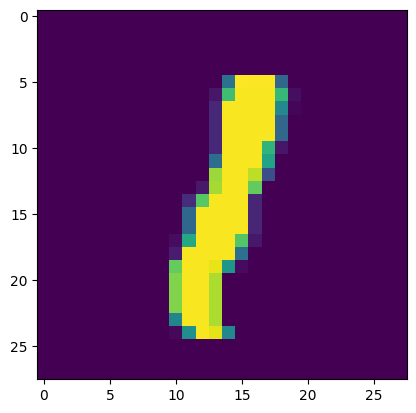

In [7]:
plt.imshow(df.iloc[9977,1:].values.reshape(28,28))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:], df.iloc[:,0], test_size=0.2, random_state=42
)

In [17]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # u

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [20]:
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

4.2054407596588135


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9550977284733227

In [22]:
# use PCA

In [23]:
# use standerd scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [30]:
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=200)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)


In [31]:
X_train_pca.shape

(15144, 200)

In [32]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:

y_pred2=knn.predict(X_test_pca)

In [34]:
accuracy_score(y_test,y_pred2)

0.9318541996830428

In [36]:
for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca,y_train)
    y_pred2=knn.predict(X_test_pca)
    print(i,accuracy_score(y_test,y_pred2))

KeyboardInterrupt: 

In [ ]:
# 90